<a href="https://colab.research.google.com/github/SamiaNoor/ceri8211globalgeophysics/blob/master/SamiaHW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import essential library and commands
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

# Upload data file
from google.colab import files
uploaded=files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Hasterok-EPSL-2013-Data.xlsx to Hasterok-EPSL-2013-Data.xlsx


In [0]:
# Import and read datafile
import io
df=pd.read_excel(io.BytesIO(uploaded['Hasterok-EPSL-2013-Data.xlsx']))
df

,Age bin,Unnamed: 1,Unnamed: 2,Uncorrected,Unnamed: 4,Unnamed: 5,Correcteda,Unnamed: 7,Unnamed: 8,Site
0,Min,Max,N,Q1,Q2,Q3,Q1,Q2,Q3,NaN
1,(Ma),(Ma),NaN,(mW m−2),(mW m−2),(mW m−2),(mW m−2),(mW m−2),(mW m−2),NaN
2,Site-specific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4,2.4,98,230,254,276,297.4,327,421.7,JdF
4,2.5,4.5,118,183.3,199,206.8,209.6,232.1,298.2,JdF
...,...,...,...,...,...,...,...,...,...,...
73,167.5,170,22,42.6,46.5,53.7,47.7,53.3,60.2,NaN
74,170,172.5,21,42.2,49.2,55.5,43.9,52.3,61.9,NaN
75,172.5,175,31,45.4,51.5,58.5,53.2,62.3,69.9,NaN
76,175,177.5,53,43.4,49.5,55,49.9,57.5,63.4,NaN


In [0]:
# Separating dataset for Site specific, Filtered, and Global (unfiltered) data
site_specific = df.loc[3:11,:]
site_specific.head(n=5)

,Age bin,Unnamed: 1,Unnamed: 2,Uncorrected,Unnamed: 4,Unnamed: 5,Correcteda,Unnamed: 7,Unnamed: 8,Site
3,0.4,2.4,98,230,254,276,297.4,327,421.7,JdF
4,2.5,4.5,118,183.3,199,206.8,209.6,232.1,298.2,JdF
5,5,8,300,141.5,197.1,270.7,144.6,201.4,276.1,CRR
6,11.9,13.9,6,NaN,NaN,NaN,134.7,136.9,143.4,GoAb
7,17.2,19.2,39,112,117,121,115,120.4,125.3,CR


In [0]:
filtered = df.loc[14:29,:]
filtered.head(n=5)

,Age bin,Unnamed: 1,Unnamed: 2,Uncorrected,Unnamed: 4,Unnamed: 5,Correcteda,Unnamed: 7,Unnamed: 8,Site
14,25,27.5,98,66.3,90.2,110.4,78.8,97.5,120.5,NaN
15,27.5,30,75,61.4,85.8,98.6,70.4,96.1,112.2,NaN
16,30,32.5,65,62.8,75,92,71,89.9,104.7,NaN
17,32.5,35,104,59,72.5,84.5,67.8,83.9,101.3,NaN
18,35,37.5,113,60.6,79.6,99.9,79.3,104.1,138.7,NaN


In [0]:
unfiltered = df.loc[32:,:]
unfiltered.head(n=5)

,Age bin,Unnamed: 1,Unnamed: 2,Uncorrected,Unnamed: 4,Unnamed: 5,Correcteda,Unnamed: 7,Unnamed: 8,Site
32,65,67.5,85,43.3,59,67,44.6,60.8,67.5,NaN
33,67.5,70,114,56.1,62.6,69.1,57.6,64.8,70.5,NaN
34,70,72.5,89,51.6,64.5,72,52,67.4,74.6,NaN
35,72.5,75,87,47.8,62,72.8,49.2,64.9,76.4,NaN
36,75,77.5,97,52.5,62.8,70.7,53.1,63.9,71.9,NaN


In [0]:
nums = list(site_specific['Unnamed: 1'])+list(filtered['Unnamed: 1'])+list(unfiltered['Unnamed: 1'])
#print(nums)

def heat(t):
  if t<=55:
    Q = 510/t**0.5
  else:
    Q = 48 + 96 * np.exp(-0.0278*t)
  return Q
heat_flow=[]
for t in nums:
  heat_flow.append(heat(t))
#print(heat_flow)

[2.4, 4.5, 8, 13.9, 19.2, 20.8, 22.3, 23.8, 25.6, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90, 92.5, 95, 97.5, 100, 102.5, 105, 107.5, 110, 112.5, 115, 117.5, 120, 122.5, 125, 127.5, 130, 132.5, 135, 137.5, 140, 142.5, 145, 147.5, 150, 152.5, 155, 157.5, 160, 162.5, 165, 167.5, 170, 172.5, 175, 177.5, 180]
[329.2035844276304, 240.41630560342617, 180.3122292025696, 136.7926541003841, 116.3910434698478, 111.82489746164622, 107.99850522134481, 104.53980786557544, 100.79760041786709, 97.25318410305042, 93.11283477587824, 89.45991796931699, 86.20573398230869, 83.28265125462805, 80.63808033429366, 78.23042886243178, 76.02631123499285, 73.99857751122119, 72.12489168102785, 70.38668705292014, 68.7683859712507, 67.41116064180859, 66.10789790546661, 64.8921360554075, 63.75800029379751, 62.70001025594582, 61.71305352811596, 60.79236094334781, 59.93348353591482, 59.1322710430559, 58.38485185009816, 57.687614282061

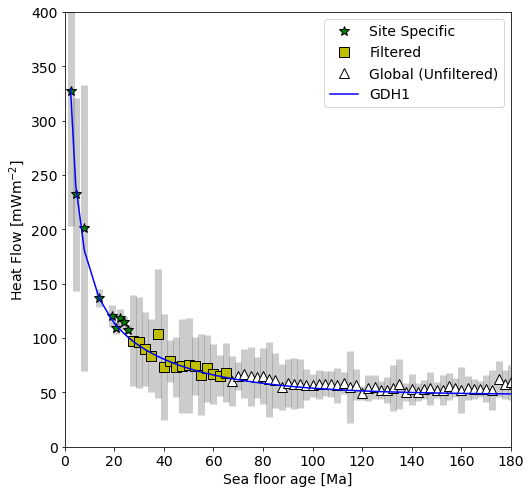

In [0]:
# Defining IQR (Inter Quartile Range) to plot error bars
yerr_ss=site_specific.iloc[:,8]-site_specific.iloc[:,6]
yerr_f=filtered.iloc[:,8]-filtered.iloc[:,6]
yerr_uf=unfiltered.iloc[:,8]-unfiltered.iloc[:,6]

# Plot results as shown in the article (Figure 3B)
plt.figure(figsize=(8,8))
plt.plot(site_specific.iloc[:,1],site_specific.iloc[:,7],'g*', filtered.iloc[:,1],filtered.iloc[:,7],'ys',unfiltered.iloc[:,1],unfiltered.iloc[:,7],'w^', markersize=10, markeredgecolor='k')
plt.errorbar(site_specific.iloc[:,1],site_specific.iloc[:,7], yerr=yerr_ss, fmt='none', ecolor='gray', elinewidth=7, alpha=0.4)
plt.errorbar(filtered.iloc[:,1], filtered.iloc[:,7], yerr=yerr_f, fmt='none', ecolor='gray', elinewidth=7, alpha=0.4)
plt.errorbar(unfiltered.iloc[:,1],unfiltered.iloc[:,7],yerr=yerr_uf, fmt='none', ecolor='gray', elinewidth=7, alpha=0.4)
plt.plot(nums,heat_flow,'b-')
plt.xlim(0,180)
plt.ylim(0,400)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Site Specific", "Filtered", "Global (Unfiltered)", "GDH1"], fontsize=14)
plt.xlabel("Sea floor age [Ma]", fontsize=14)
plt.ylabel(r'Heat Flow [mWm$\mathregular{^{-2}}$]', fontsize=14)
plt.show()